In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [98]:
HousePrice = pd.read_csv('/content/drive/MyDrive/my project/house price prediction/House_Price_India.csv')

In [99]:
HousePrice.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,Area of the basement,living_area_renov,lot_area_renov,Distance from the airport,Price,condition of the house
0,5,2.50,3650,9050,2.0,280,2880,5400,58,2380000,5
1,4,2.50,2920,4000,1.5,1010,2470,4000,51,1400000,5
2,5,2.75,2910,9480,1.5,0,2940,6600,53,1200000,3
3,4,2.50,3310,42998,2.0,0,3350,42847,76,838000,3
4,3,2.00,2710,4500,1.5,830,2060,4500,51,805000,4


In [100]:
HousePrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   number of bedrooms         14620 non-null  int64  
 1   number of bathrooms        14620 non-null  float64
 2   living area                14620 non-null  int64  
 3   lot area                   14620 non-null  int64  
 4   number of floors           14620 non-null  float64
 5   Area of the basement       14620 non-null  int64  
 6   living_area_renov          14620 non-null  int64  
 7   lot_area_renov             14620 non-null  int64  
 8   Distance from the airport  14620 non-null  int64  
 9   Price                      14620 non-null  int64  
 10  condition of the house     14620 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 1.2 MB


In [101]:
HousePrice.describe()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,Area of the basement,living_area_renov,lot_area_renov,Distance from the airport,Price,condition of the house
count,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000
mean,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,296.479070,1996.702257,12753.500068,64.950958,5.389322e+05,3.430506
std,0.938719,0.769934,928.275721,3.791962e+04,0.540239,448.551409,691.093366,26058.414467,8.936008,3.675324e+05,0.664151
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,460.000000,651.000000,50.000000,7.800000e+04,1.000000
25%,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,1490.000000,5097.750000,57.000000,3.200000e+05,3.000000
50%,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,1850.000000,7620.000000,65.000000,4.500000e+05,3.000000
75%,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,580.000000,2380.000000,10125.000000,73.000000,6.450000e+05,4.000000
max,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,4820.000000,6110.000000,560617.000000,80.000000,7.700000e+06,5.000000


In [102]:
HousePrice.columns

Index(['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'Area of the basement', 'living_area_renov',
       'lot_area_renov', 'Distance from the airport', 'Price',
       'condition of the house'],
      dtype='object')

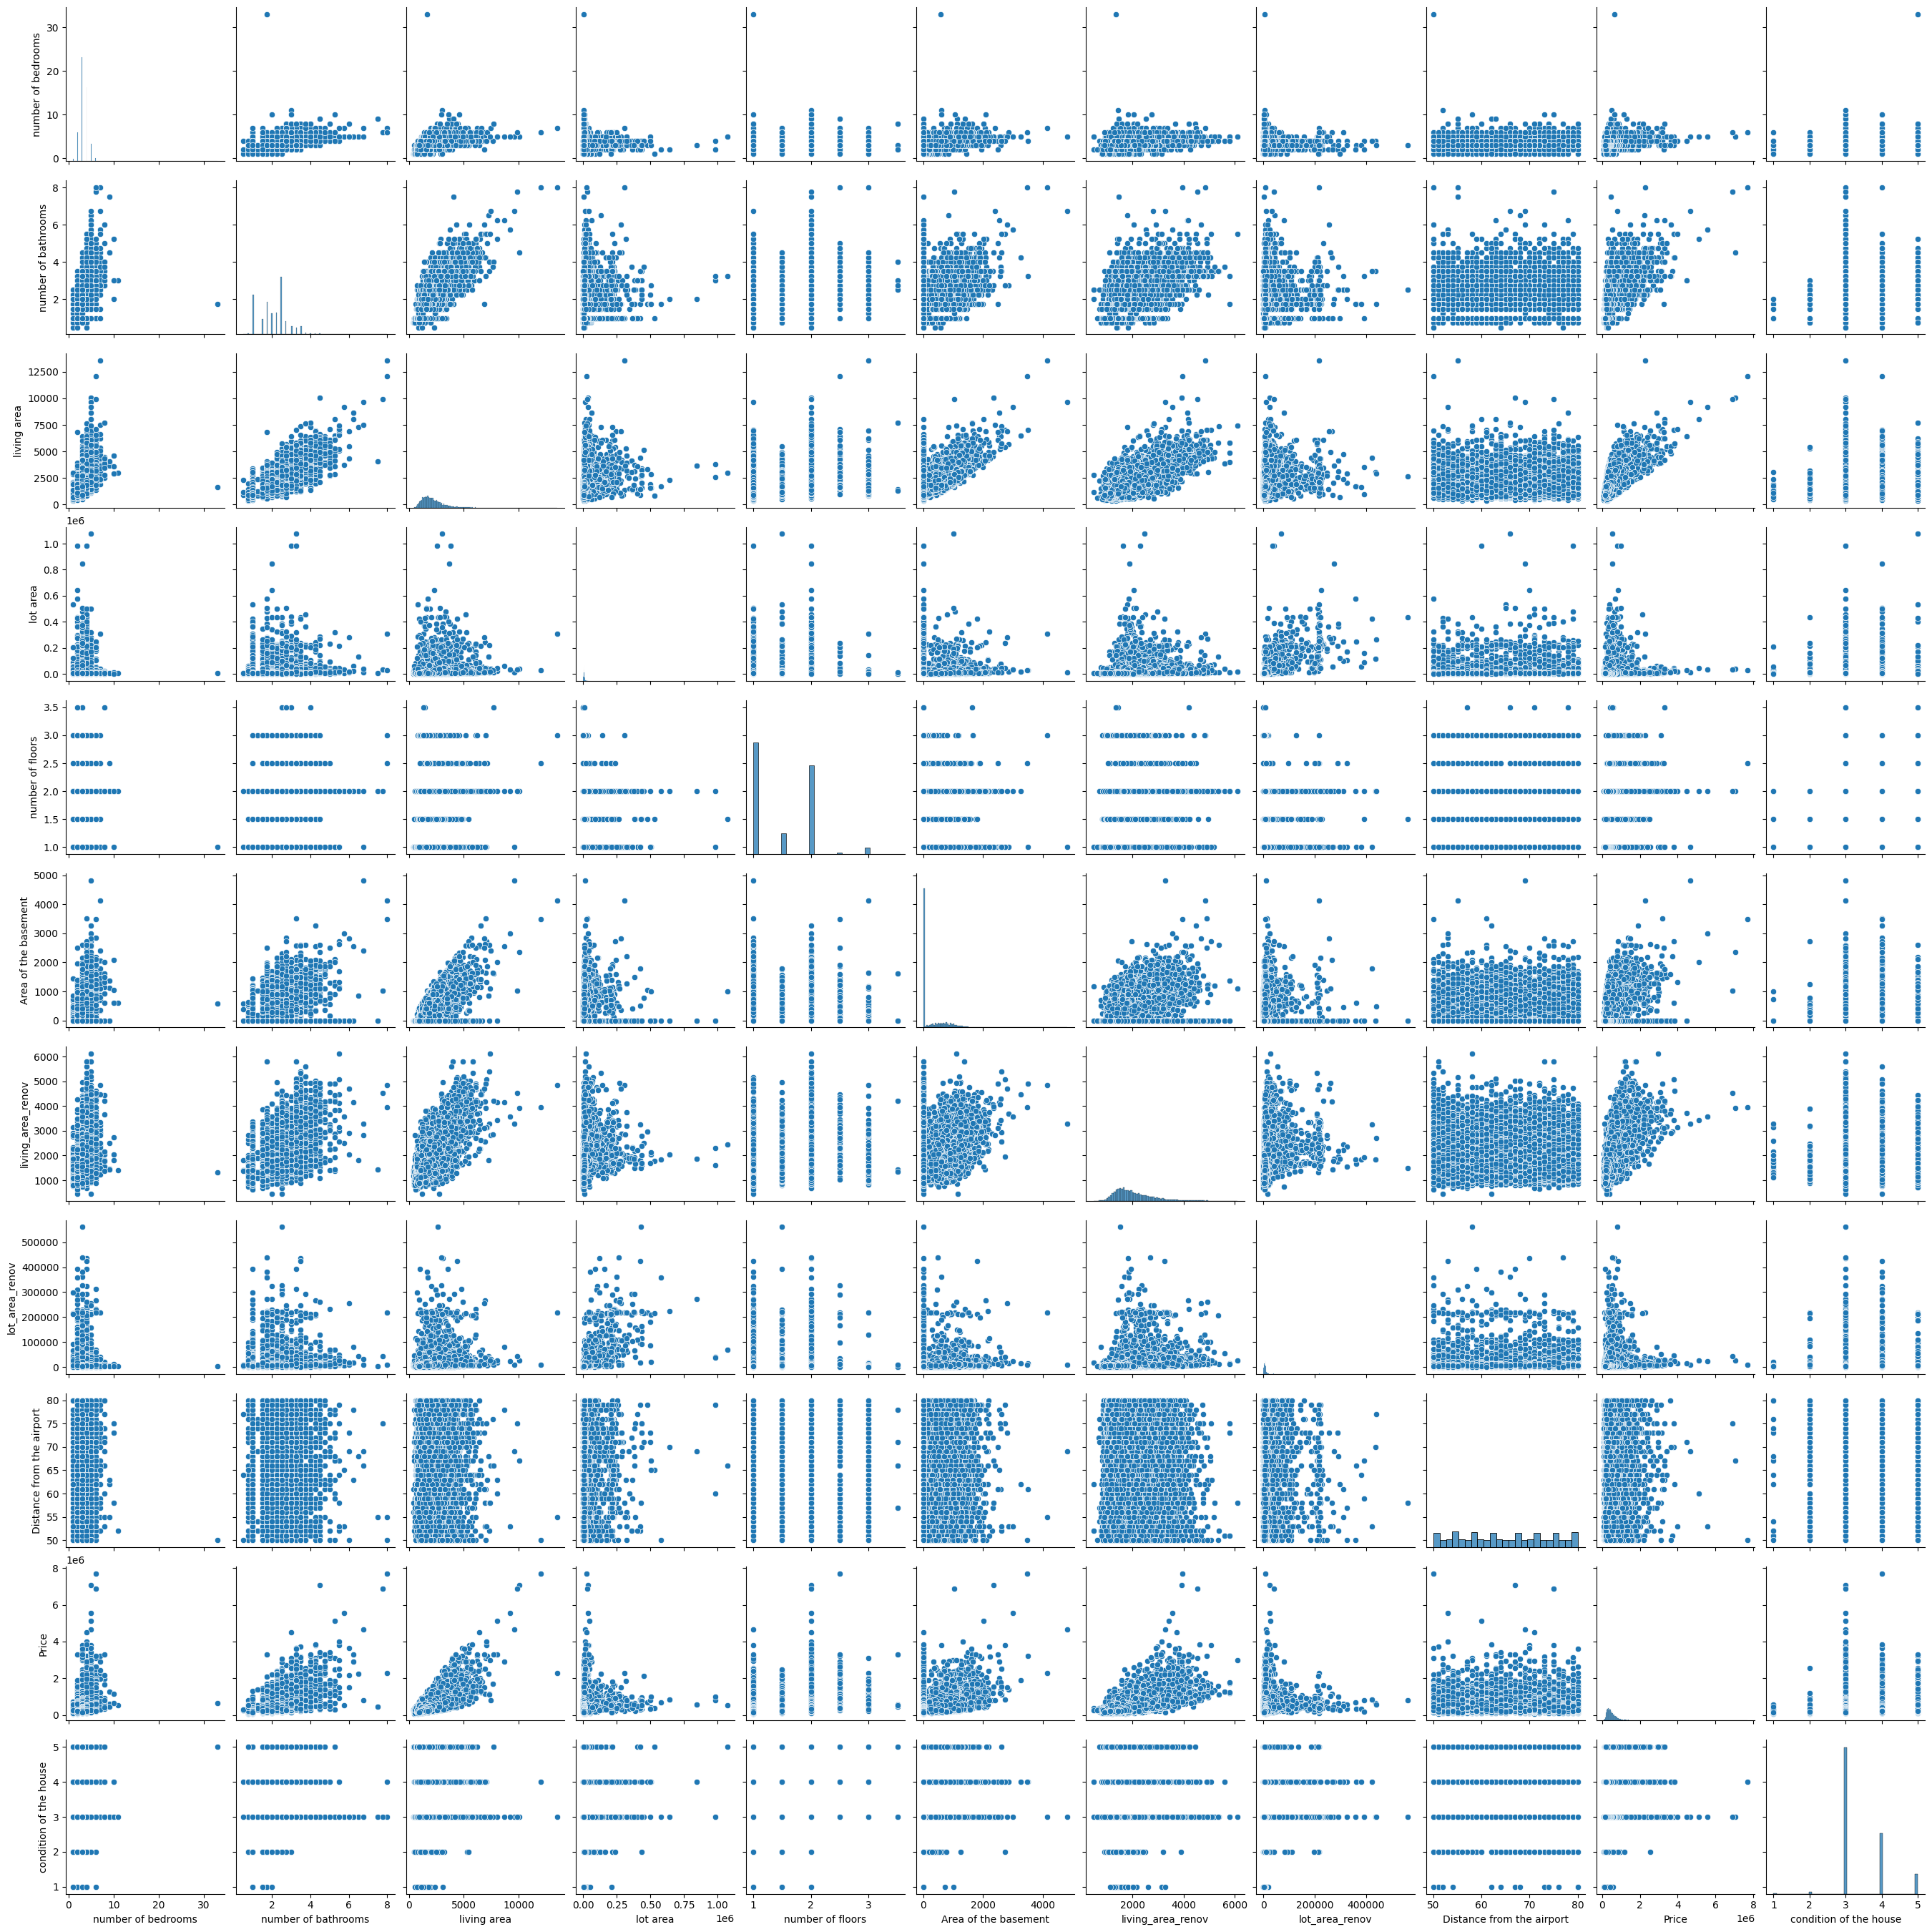

In [103]:
sns.pairplot(HousePrice)

<Axes: >

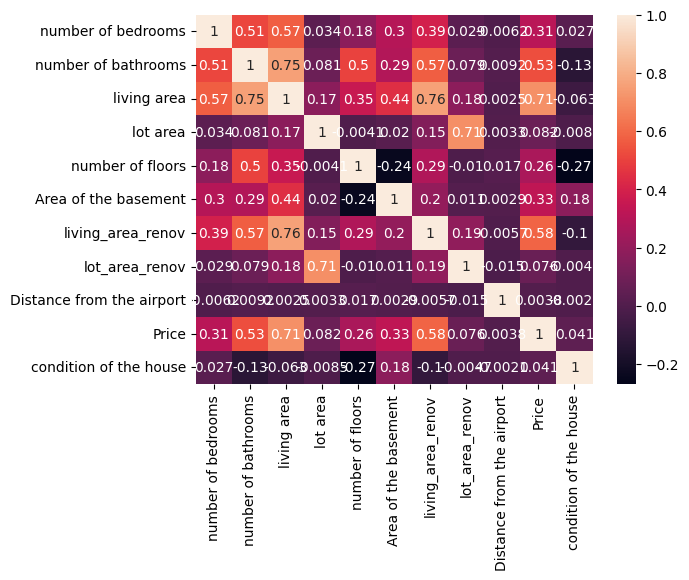

In [104]:
sns.heatmap(HousePrice.corr(), annot=True)

In [105]:
x=HousePrice[['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'Area of the basement', 'living_area_renov',
       'lot_area_renov', 'Distance from the airport',
       'condition of the house']]
y=HousePrice['Price']

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.3,random_state=101)

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
lm= LinearRegression()

In [110]:
lm.fit(x_train,y_train)

LinearRegression()

In [111]:
print(lm.intercept_)

-230225.50927697797


In [112]:
coeff_df = pd.DataFrame(lm.coef_,x.columns, columns=['Coefficient'])

In [113]:
predictions = lm.predict(x_test)

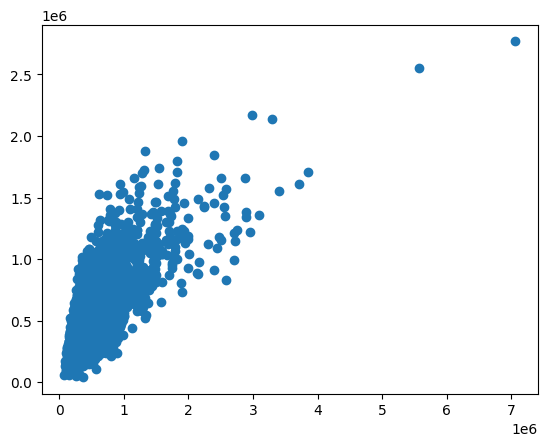

In [114]:
plt.scatter(y_test,predictions)

<ipython-input-115-18221bb9014a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=100);


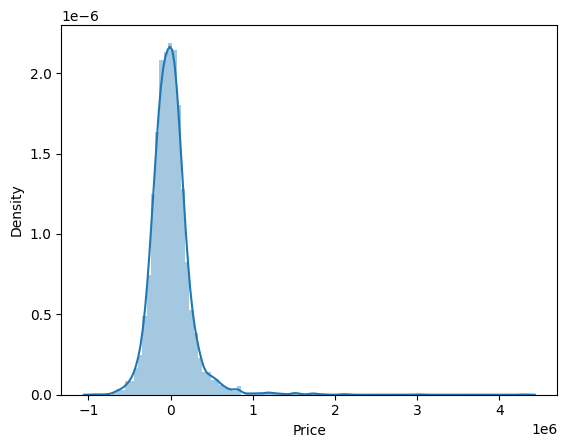

In [115]:
sns.distplot((y_test-predictions),bins=100);

In [116]:
from sklearn import metrics

In [117]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 162481.29476189832
MSE: 61285294343.50816
RMSE: 247558.6684879125
